# Importamos las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import mysql.connector
import configparser
from xlsxwriter import Workbook

### Leemos el archivo de Frutas y Hortalizas

In [2]:
nombre_archivo = 'Frutas y Hortalizas.csv'
df_fruits = pd.read_csv(nombre_archivo)
df_fruits

,_id,RegiUn,Tipo punto monitoreo,Sector,Semana,Fecha,Tipo producto,Producto,MInimo,M*ximo,Promedio
0,1,7,Feria libre,Talca,28,08/07/2013,Fruta-Hortaliza,Ajo Chino $/unidad 1a (guarda),125,150,"137,5"
1,2,7,Feria libre,CuricÛ,28,08/07/2013,Fruta-Hortaliza,Ajo Chino $/unidad 1a (guarda),100,160,140
2,3,7,Feria libre,Talca,28,08/07/2013,Fruta-Hortaliza,Ajo Chino $/unidad 2a (guarda),100,100,100
3,4,7,Feria libre,Talca,28,08/07/2013,Fruta-Hortaliza,Apio Americano $/unidad Primera,800,800,800
4,5,7,Feria libre,CuricÛ,28,08/07/2013,Fruta-Hortaliza,Apio Americano $/unidad Primera,800,900,850
...,...,...,...,...,...,...,...,...,...,...,...
21755,21756,13,Supermercado,Centro,39,23/09/2013,Fruta-Hortaliza,Zapallo italiano Sin Especificar $/unidad Primera,477,589,"518,8"
21756,21757,13,Supermercado,Poniente,39,23/09/2013,Fruta-Hortaliza,Zapallo italiano Sin Especificar $/unidad Primera,490,619,"566,75"
21757,21758,13,Supermercado,Oriente,39,23/09/2013,Fruta-Hortaliza,Zapallo italiano Sin Especificar $/unidad Primera,559,599,"573,4"
21758,21759,13,Supermercado,Norte,39,23/09/2013,Fruta-Hortaliza,Zapallo italiano Sin Especificar $/unidad Primera,559,619,589


### Leemos el archivo de Resto de productos

In [3]:
nombre_archivo = 'Resto de productos.csv'
df_others = pd.read_csv(nombre_archivo)
df_others

,_id,RegiUn,Tipo punto monitoreo,Sector,Semana,Fecha,Tipo producto,Producto,MInimo,M*ximo,Promedio
0,1,7,CarnicerÌa,Talca,28,2013-08-07T00:00:00,Carne de Bovino CategorÌa V,Abastero,3990,5998,"5029,64"
1,2,7,CarnicerÌa,CuricÛ,28,2013-08-07T00:00:00,Carne de Bovino CategorÌa V,Abastero,3498,4980,4491
2,3,7,CarnicerÌa,Talca,28,2013-08-07T00:00:00,Carne de Bovino CategorÌa V,Asado Carnicero,3990,5500,"4790,64"
3,4,7,CarnicerÌa,CuricÛ,28,2013-08-07T00:00:00,Carne de Bovino CategorÌa V,Asado Carnicero,3498,4980,4441
4,5,7,CarnicerÌa,Talca,28,2013-08-07T00:00:00,Carne de Bovino CategorÌa V,Asiento,4680,6998,"6243,6"
...,...,...,...,...,...,...,...,...,...,...,...
3495,3496,8,Supermercado,Penco,39,2013-09-23T00:00:00,"Carne de Pollo, Cerdo y Pavo",Chuleta (Parrillera),3290,3489,"3389,5"
3496,3497,8,Supermercado,Talcahuano-HualpÈn,39,2013-09-23T00:00:00,"Carne de Pollo, Cerdo y Pavo",Chuleta (centro),3990,4199,"4059,67"
3497,3498,8,Supermercado,ConcepciÛn,39,2013-09-23T00:00:00,"Carne de Pollo, Cerdo y Pavo",Chuleta (centro),3790,4499,"4137,44"
3498,3499,8,Supermercado,Chiguayante,39,2013-09-23T00:00:00,"Carne de Pollo, Cerdo y Pavo",Chuleta (centro),4190,4190,4190


In [4]:
df_others['Fecha'] = pd.to_datetime(df_others['Fecha'])

# Aplica el formato DD/MM/YYYY a la columna 'Fecha'
df_others['Fecha'] = df_others['Fecha'].dt.strftime('%d/%m/%Y')
df_others

,_id,RegiUn,Tipo punto monitoreo,Sector,Semana,Fecha,Tipo producto,Producto,MInimo,M*ximo,Promedio
0,1,7,CarnicerÌa,Talca,28,07/08/2013,Carne de Bovino CategorÌa V,Abastero,3990,5998,"5029,64"
1,2,7,CarnicerÌa,CuricÛ,28,07/08/2013,Carne de Bovino CategorÌa V,Abastero,3498,4980,4491
2,3,7,CarnicerÌa,Talca,28,07/08/2013,Carne de Bovino CategorÌa V,Asado Carnicero,3990,5500,"4790,64"
3,4,7,CarnicerÌa,CuricÛ,28,07/08/2013,Carne de Bovino CategorÌa V,Asado Carnicero,3498,4980,4441
4,5,7,CarnicerÌa,Talca,28,07/08/2013,Carne de Bovino CategorÌa V,Asiento,4680,6998,"6243,6"
...,...,...,...,...,...,...,...,...,...,...,...
3495,3496,8,Supermercado,Penco,39,23/09/2013,"Carne de Pollo, Cerdo y Pavo",Chuleta (Parrillera),3290,3489,"3389,5"
3496,3497,8,Supermercado,Talcahuano-HualpÈn,39,23/09/2013,"Carne de Pollo, Cerdo y Pavo",Chuleta (centro),3990,4199,"4059,67"
3497,3498,8,Supermercado,ConcepciÛn,39,23/09/2013,"Carne de Pollo, Cerdo y Pavo",Chuleta (centro),3790,4499,"4137,44"
3498,3499,8,Supermercado,Chiguayante,39,23/09/2013,"Carne de Pollo, Cerdo y Pavo",Chuleta (centro),4190,4190,4190


### Datos nulos
Verificamos la cantidad de datos nulos

In [5]:
def null_data(df):
    return df.isnull().sum()

In [6]:
display(null_data(df_fruits))
display(null_data(df_others))

_id                     0
RegiUn                  0
Tipo punto monitoreo    0
Sector                  0
Semana                  0
Fecha                   0
Tipo producto           0
Producto                0
MInimo                  0
M*ximo                  0
Promedio                0
dtype: int64

_id                     0
RegiUn                  0
Tipo punto monitoreo    0
Sector                  0
Semana                  0
Fecha                   0
Tipo producto           0
Producto                0
MInimo                  0
M*ximo                  0
Promedio                0
dtype: int64

In [7]:
def nan_data(df):
    return df.isna().sum()

In [8]:
display(nan_data(df_fruits))
display(nan_data(df_others))

_id                     0
RegiUn                  0
Tipo punto monitoreo    0
Sector                  0
Semana                  0
Fecha                   0
Tipo producto           0
Producto                0
MInimo                  0
M*ximo                  0
Promedio                0
dtype: int64

_id                     0
RegiUn                  0
Tipo punto monitoreo    0
Sector                  0
Semana                  0
Fecha                   0
Tipo producto           0
Producto                0
MInimo                  0
M*ximo                  0
Promedio                0
dtype: int64

# Conexión con la Base de Datos

In [9]:
class Connection:

    """
        Inicializa una conexión a la base de datos utilizando la información de configuración proporcionada en
        el archivo 'config.ini'.
    """
    def __init__(self):
        config = configparser.ConfigParser()
        config.read('Resources/config.ini')
        connection_info = config['database']

        self.connection = mysql.connector.connect(
            database=connection_info['database'],
            host=connection_info['host'],
            user=connection_info['user'],
            password=connection_info['password'],
            port=connection_info['port']
        )

    """
        Ejecuta una consulta en la base de datos y realiza una confirmación de la transacción.

        Args:
            query (str): La consulta SQL que se va a ejecutar.

    """
    def execute(self, query):
        cursor = self.connection.cursor()
        cursor.execute(query, multi=True)
        self.connection.commit()

    """
        Ejecuta una consulta SELECT en la base de datos y devuelve los resultados como una lista de tuplas.

        Args:
            query (str): La consulta SELECT SQL que se va a ejecutar.

        Returns:
            list: Una lista de tuplas que representan los resultados de la consulta.

    """
    def execute_select(self, query):
        cursor = self.connection.cursor()
        cursor.execute(query)
        result = cursor.fetchall()
        cursor.close()
        return result

    """
        Ejecuta una consulta SELECT en la base de datos y devuelve los resultados como un DataFrame de Pandas.

        Args:
            query (str): La consulta SELECT SQL que se va a ejecutar.

        Returns:
            pandas.DataFrame or None: Un DataFrame de Pandas que contiene los resultados de la consulta o None si no 
            hay resultados.

    """
    def execute_select_as_dataframe(self, query):
        result = self.execute_select(query)
        if result:
            cursor = self.connection.cursor()
            cursor.execute(query)
            columns = [desc[0] for desc in cursor.description]
            cursor.close()

            df = pd.DataFrame(result, columns=columns)
            return df
        else:
            return None

    """
        Ejecuta una consulta SELECT en la base de datos y devuelve los resultados como una lista de tuplas.

        Args:
            query (str): La consulta SELECT SQL que se va a ejecutar.

        Returns:
            list: Una lista de tuplas que representan los resultados de la consulta.

    """
    def select(self, query):
        cursor = self.connection.cursor()
        cursor.execute(query)
        result = cursor.fetchall()
        cursor.close()
        return result

    """
        Cierra la conexión a la base de datos.
    """
    def close(self):
        self.connection.close()

In [10]:
connection = Connection()

In [11]:
with open('Scripts/star_schema.sql', 'r') as file:
    for line in file.read().split(';'):
        connection.execute(line)

In [12]:
class Transform:

    def __init__(self, df):
        self._df = df
        self._df_time = None
        self._df_product = None
        self._df_city = None
        self._df_products_price = None

    """
       Extrae y procesa los datos de correspondientes a la tabla tiempo a partir de un DataFrame dado.

       Esta función toma un DataFrame como entrada y realiza las siguientes operaciones:
       1. Selecciona las columnas 'Semana' y 'Fecha' del DataFrame original.
       2. Elimina filas duplicadas basadas en la columna 'Fecha'.
       3. Cambia los nombres de las columnas 'Semana' a 'week' y 'Fecha' a 'date' en el DataFrame resultante.

       Args:
           df (pandas.DataFrame): El DataFrame de entrada que contiene todos los datos del archivo original.
       """
    def __extract_df_time(self, df):
        self._df_time = df[["Semana", "Fecha"]]
        df_without_duplicates = self._df_time[~self._df_time.duplicated('Fecha')]
        self._df_time = df_without_duplicates
        new_columns_name = {'Semana': 'week', 'Fecha': 'date'}
        self._df_time = self._df_time.rename(columns=new_columns_name)
        self._df_time['date'] = pd.to_datetime(self._df_time['date'], format='%d/%m/%Y')



    """
    Añade la columna 'year' a un DataFrame que contiene datos de tiempo.

    Esta función toma un DataFrame que contiene una columna 'date' con fechas en el formato '%d/%m/%Y' y agrega una 
    nueva columna 'year' que representa el año de cada fecha.

    Args:
        df (pandas.DataFrame): El DataFrame de entrada que contiene los datos originales.
    
    def __add_year_df_time(self, df):
        df['year'] = df['date'].str[-4:]
        null_dates = df[df['year'].isnull()]['date'].tolist()
        display(null_dates)
        display(nan_data(df['year']))
        """
    def __add_year_df_time(self, df):
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
        df['year'] = df['date'].dt.year
        display(nan_data(df['year']))

    """
        Añade la columna 'day' que representa el día del mes a un DataFrame que contiene datos de tiempo.

        Esta función toma un DataFrame que contiene una columna 'date' con fechas y agrega una nueva columna 'day' que 
        representa el día del mes correspondiente a cada fecha.

        Args:
            df (pandas.DataFrame): El DataFrame de entrada que contiene los datos de tiempo con una columna 'date'.
    """
    def __add_day_df_time(self, df):
        df['day'] = df['date'].dt.day
        display(nan_data(df['day']))


    """
        Añade la columna 'month' que representa el mes a un DataFrame que contiene datos de tiempo.

        Esta función toma un DataFrame que contiene una columna 'date' con fechas y agrega una nueva columna 'month' 
        que representa el mes correspondiente a cada fecha.

        Args:
            df (pandas.DataFrame): El DataFrame de entrada que contiene los datos de tiempo con una columna 'date'.
        """    
    def __add_month_df_time(self, df):
        df['month'] = df['date'].dt.month
        display(nan_data(df['month']))


    """
        Añade una columna de identificación 'id' a un DataFrame que contiene datos de tiempo.

        Esta función toma un DataFrame y agrega una nueva columna 'id' que contiene un número único para cada fila del 
        DataFrame, utilizado como identificación.

        Args:
            df (pandas.DataFrame): El DataFrame de entrada al que se le agregará la columna 'id'.
        """
    def __add_id_df_time(self, df):
        df['id'] = range(1, len(df) + 1)

    """
        Extrae y procesa datos relacionados con ciudades a partir de un DataFrame dado.

        Esta función toma un DataFrame como entrada y realiza las siguientes operaciones:
        1. Selecciona las columnas 'RegiUn' y 'Sector' del DataFrame original.
        2. Elimina filas duplicadas basadas en la columna 'Sector'.
        3. Cambia los nombres de las columnas 'RegiUn' a 'region' y 'Sector' a 'name' en el DataFrame resultante.

        Args:
            df (pandas.DataFrame): El DataFrame de entrada que contiene los datos originales.
        """
    def __extract_df_city(self, df):
        self._df_city = df[["RegiUn", "Sector"]]
        df_without_duplicates = self._df_city[~self._df_city.duplicated('Sector')]
        self._df_city = df_without_duplicates
        new_columns_name = {'RegiUn': 'region', 'Sector': 'name'}
        self._df_city = self._df_city.rename(columns=new_columns_name)

    """
        Añade una columna de identificación 'id' a un DataFrame que contiene datos relacionados con ciudades.

        Esta función toma un DataFrame y agrega una nueva columna 'id' que contiene un número único para cada fila del 
        DataFrame, utilizado como identificación.

        Args:
            df (pandas.DataFrame): El DataFrame de entrada al que se le agregará la columna 'id'.
        """
    def __add_id_df_city(self, df):
        df['id'] = range(1, len(df) + 1)

    """
    Extrae y procesa datos relacionados con productos a partir de un DataFrame dado.

    Esta función toma un DataFrame como entrada y realiza las siguientes operaciones:
    1. Selecciona las columnas 'Tipo producto' y 'Producto' del DataFrame original.
    2. Divide la columna 'Producto' en el símbolo '$', toma la primera parte y elimina espacios finales, asignándola a 
        la columna 'name'.
    3. Elimina la columna 'Producto'.
    4. Cambia el nombre de la columna 'Tipo producto' a 'type'.
    5. Elimina filas duplicadas basadas en la columna 'name'.

    Args:
        df (pandas.DataFrame): El DataFrame de entrada que contiene los datos originales.
    """
    def __extract_df_product(self, df):
        self._df_product = df[["Tipo producto", "Producto"]]
        self._df_product['name'] = self._df_product['Producto'].str.split('$').str[0].str.rstrip()
        self._df_product = self._df_product.drop(columns=['Producto'])
        new_columns_name = {'Tipo producto': 'type'}
        self._df_product = self._df_product.rename(columns=new_columns_name)
        df_without_duplicates = self._df_product[~self._df_product.duplicated('name')]
        self._df_product = df_without_duplicates

    """
        Añade una columna de identificación 'id' a un DataFrame que contiene datos relacionados con productos.

        Esta función toma un DataFrame y agrega una nueva columna 'id' que contiene un número único para cada fila del 
        DataFrame, utilizado como identificación.

        Args:
            df (pandas.DataFrame): El DataFrame de entrada al que se le agregará la columna 'id'.
        """
    def __add_id_df_product(self, df):
        df['id'] = range(1, len(df) + 1)

    """
        Transforma caracteres especiales en los nombres de productos y sectores en un DataFrame.

        Esta función toma un DataFrame como entrada y reemplaza caracteres especiales en las columnas 'Producto' y 
        'Sector' utilizando un diccionario de reemplazo.

        Args:
            df (pandas.DataFrame): El DataFrame de entrada que contiene los nombres de productos y sectores con 
            caracteres especiales.
        """
    def __transform_char_products_price(self, df):
        dict = {
            "Û": "ó",
            "È": "é",
            "·": "á",
            "Ì": "í",
            "Ò": "ñ",
            "˙": "ú",
            '""': ""
        }

        df['Producto'] = df['Producto'].replace(dict, regex=True)
        df['Tipo producto'] = df['Tipo producto'].replace(dict, regex=True)
        df['Tipo punto monitoreo'] = df['Tipo punto monitoreo'].replace(dict, regex=True)

        dict = {
            "Û": "ó",
            "È": "é",
        }

        df['Sector'] = df['Sector'].replace(dict, regex=True)

    """
        Transforma un DataFrame de precios de productos mediante la fusión con otros DataFrames.

        Esta función toma un DataFrame como entrada, realiza varias transformaciones y fusiones de datos, y 
        dejando como producto el DataFrame original con información adicional referencial de las tablas ciudades, 
        tiempo y productos.

        Args:
            df (pandas.DataFrame): El DataFrame de entrada que contiene los datos originales.
        """
    def __transform_products_price(self, df):
        self._df['Fecha'] = pd.to_datetime(self._df['Fecha'], format='%d/%m/%Y')

        self._df = pd.merge(self._df, self._df_city, how='left', left_on='Sector', right_on='name')
        self._df.drop(columns=['name', 'region'], inplace=True)
        new_columns_name = {'id': 'id_city'}
        self._df = self._df.rename(columns=new_columns_name)

        self._df = pd.merge(self._df, self._df_time, how='left', left_on=['Fecha'], right_on=['date'])
        self._df.drop(columns=['week', 'date', 'day', 'month', 'year'], inplace=True)
        new_columns_name = {'id': 'id_time'}
        self._df = self._df.rename(columns=new_columns_name)

        self._df['Producto'] = self._df['Producto'].str.split('$').str[0].str.rstrip()
        self._df = pd.merge(self._df, self._df_product, how='left', left_on=['Producto'], right_on=['name'])
        self._df.drop(columns=['type', 'name'], inplace=True)
        new_columns_name = {'id': 'id_product'}
        self._df = self._df.rename(columns=new_columns_name)

        new_columns_name = {'MInimo': 'min', 'M*ximo': 'max', 'Promedio': 'average', 'Tipo punto monitoreo': 'spot'}
        self._df = self._df.rename(columns=new_columns_name)
        self._df.drop(columns=['RegiUn', 'Sector', 'Semana', 'Fecha', 'Tipo producto', 'Producto'], inplace=True)
        self._df_products_price = self._df
    """
    Reordena las columnas de un DataFrame relacionado con datos de tiempo.

    Esta función toma un DataFrame como entrada y reordena las columnas en un orden específico que incluye 'day', 
    'month', 'year', 'date', 'week', y 'id'.

    Args:
        df (pandas.DataFrame): El DataFrame de entrada que contiene los datos de tiempo.
    """
    def __reorder_columns_time(self, df):
        self._df_time = df[['day', 'month', 'year', 'date', 'id']]
    """
    Reordena las columnas de un DataFrame relacionado con datos de productos.

    Esta función toma un DataFrame como entrada y reordena las columnas en un orden específico que incluye 'id', 
    'type' y 'name'.

    Args:
        df (pandas.DataFrame): El DataFrame de entrada que contiene los datos de productos.
    """
    def __reorder_columns_product(self, df):
        self._df_product = df[['id', 'type', 'name']]

    """
        Reordena las columnas de un DataFrame relacionado con datos de ciudades.

        Esta función toma un DataFrame como entrada y reordena las columnas en un orden específico que incluye 'id', 
        'name' y 'region'.

        Args:
            df (pandas.DataFrame): El DataFrame de entrada que contiene los datos de ciudades.
    """
    def __reorder_columns_city(self, df):
        self._df_city = df[['id', 'name', 'region']]

    """
        Reordena las columnas de un DataFrame relacionado con precios de productos.

        Esta función toma un DataFrame como entrada y reordena las columnas en un orden específico que incluye 
        'id_time', 'id_city', 'id_product', 'spot', 'min', 'max', 'average' y '_id'.

        Args:
            df (pandas.DataFrame): El DataFrame de entrada que contiene los datos de precios de productos.
    """
    def __reorder_columns_product_price(self, df):
        self._df_products_price = df[['id_time', 'id_city', 'id_product', 'spot', 'min', 'max', 'average', '_id']]

    """
        Transforma la columna 'average' de un DataFrame relacionado con precios de productos en tipo de dato numérico.

        Esta función toma un DataFrame como entrada y realiza dos operaciones:
        1. Reemplaza comas (',') por puntos ('.') en la columna 'average'.
        2. Convierte la columna 'average' a tipo de dato float.

        Args:
            df (pandas.DataFrame): El DataFrame de entrada que contiene los datos de precios de productos.
    """
    def __average_product_price(self, df):
        df['average'] = df['average'].str.replace(',', '.', regex=True)
        df['average'] = df['average'].astype(float)

    """
     Realiza una serie de transformaciones en los DataFrames para enriquecer los datos de precios de productos.

     Esta función ejecuta una serie de métodos privados en una secuencia específica para transformar los
      datos de precios de productos.
     """
    def transform(self):
        self.__transform_char_products_price(self._df)
        self.__extract_df_time(self._df)
        self.__add_year_df_time(self._df_time)
        self.__add_day_df_time(self._df_time)
        self.__add_month_df_time(self._df_time)
        self.__add_id_df_time(self._df_time)
        self.__extract_df_city(self._df)
        self.__add_id_df_city(self._df_city)
        self.__extract_df_product(self._df)
        self.__add_id_df_product(self._df_product)
        self.__transform_products_price(self._df_products_price)
        self.__reorder_columns_time(self._df_time)
        self.__reorder_columns_product(self._df_product)
        self.__reorder_columns_city(self._df_city)
        self.__reorder_columns_product_price(self._df_products_price)
        self.__average_product_price(self._df_products_price)

    def get_df_time(self):
        return self._df_time

    def get_df_product(self):
        return self._df_product

    def get_df_city(self):
        return self._df_city

    def get_df_products_price(self):
        return self._df_products_price

In [13]:
transform = Transform(df_fruits)
transform.transform()
df_time = transform.get_df_time()
display(nan_data(df_time))

df_city = transform.get_df_city()
df_product = transform.get_df_product()
df_product_price = transform.get_df_products_price()

0

0

0

C:\Users\ignac\AppData\Local\Temp\ipykernel_12776\2011640105.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._df_product['name'] = self._df_product['Producto'].str.split('$').str[0].str.rstrip()


day      0
month    0
year     0
date     0
id       0
dtype: int64

In [14]:
class Load:
    def __init__(self, df_time, df_product, df_city, df_product_price, connection):
        self._df_time = df_time
        self._df_product = df_product
        self._df_city = df_city
        self._df_product_price = df_product_price
        self._connection = connection

    """
        Carga datos de tiempo en una tabla de una base de datos a partir de un DataFrame.

        Esta función toma los datos de tiempo contenidos en un DataFrame y ejecuta una serie de consultas SQL para 
        insertar estos datos en una tabla llamada 'Time' en una base de datos.
    """
    def __load_time_table(self):
        for row in self._df_time.to_numpy():
            query = ('INSERT INTO Time (day, month, year, `date`, id) VALUES(%s,%s,%s,\'%s\',%s)' %
                     (row[0], row[1], row[2], row[3], row[4]))
            self._connection.execute(query)

    """
        Carga datos de productos en una tabla de una base de datos a partir de un DataFrame.

        Esta función toma los datos de productos contenidos en un DataFrame y ejecuta una serie de consultas SQL para 
        insertar estos datos en una tabla llamada 'Product' en una base de datos.
    """
    def __load_product_table(self):
        for row in self._df_product.to_numpy():
            type_value = row[1]
            name_value = row[2].replace("'", "''")
            query = "INSERT INTO Product (type, name) VALUES ('%s', '%s')" % (type_value, name_value)
            self._connection.execute(query)

    """
        Carga datos de ciudades en una tabla de una base de datos a partir de un DataFrame.

        Esta función toma los datos de ciudades contenidos en un DataFrame y ejecuta una serie de consultas SQL para 
        insertar estos datos en una tabla llamada 'City' en una base de datos.
    """
    def __load_city_table(self):
        for row in self._df_city.to_numpy():
            query = "INSERT INTO City (name, region) VALUES('%s', '%s')" % (row[1], row[2])
            self._connection.execute(query)

    """
        Carga datos de precios de productos en una tabla de una base de datos a partir de un DataFrame.

        Esta función toma los datos de precios de productos contenidos en un DataFrame y ejecuta una serie de consultas
         SQL para insertar estos datos en una tabla llamada 'fact_products_price' en una base de datos.
    """
    def __load_product_price_table(self):
        for row in self._df_product_price.to_numpy():
            
            query = ("INSERT INTO fact_products_price (id_time, id_city, id_product, spot, min, max, average) "
                     "VALUES(%s, %s, %s, '%s', %s, %s, %s)") % (row[0], row[1], row[2], row[3], row[4], row[5], row[6])
            self._connection.execute(query)

    """
        Carga datos en tablas de una base de datos a partir de DataFrames.

        Esta función ejecuta una serie de métodos privados en una secuencia específica para cargar datos en tablas de
         una base de datos a partir de DataFrames internos de la clase.
    """
    def load(self):
        self.__load_time_table()
        self.__load_product_table()
        self.__load_city_table()
        self.__load_product_price_table()

In [15]:
load = Load(df_time, df_product, df_city, df_product_price, connection)
display(nan_data(df_time))
load.load()

df_product_price.to_csv("fact table fruits.csv", index=False)
df_product.to_csv("product fruits.csv", index=False)
df_city.to_csv("city fruits.csv", index=False)
df_time.to_csv("time fruits.csv", index=False)

day      0
month    0
year     0
date     0
id       0
dtype: int64

In [35]:
fact_table = pd.merge(df_product_price, df_city[['id', 'name']], left_on='id_city', right_on='id', how='left')
fact_table.drop('id', axis=1, inplace=True)  # Eliminar la columna de id redundante
fact_table = fact_table.rename(columns={'name_x': 'city'})

fact_table = pd.merge(fact_table, df_city[['id', 'region']], left_on='id_city', right_on='id', how='left')
fact_table.drop('id', axis=1, inplace=True)  # Eliminar la columna de id redundante

# Combinar la tabla de hechos con la tabla de tiempo por el id de tiempo
fact_table = pd.merge(fact_table, df_time[['id', 'date']], left_on='id_time', right_on='id', how='left')
fact_table.drop('id', axis=1, inplace=True)  # Eliminar la columna de id redundante

# Combinar la tabla de hechos con la tabla de producto por el id de producto
fact_table = pd.merge(fact_table, df_product[['id', 'name']], left_on='id_product', right_on='id', how='left')
fact_table.drop('id', axis=1, inplace=True)  # Eliminar la columna de id redundante
fact_table = fact_table.rename(columns={'name_y': 'product'})

fact_table

,id_time,id_city,id_product,spot,min,max,average,_id,name_x,region,date,product
0,1,1,1,Carnicería,3990,5998,5029.64,1,Talca,7,2013-08-07,Abastero
1,1,2,1,Carnicería,3498,4980,4491.00,2,Curicó,7,2013-08-07,Abastero
2,1,1,2,Carnicería,3990,5500,4790.64,3,Talca,7,2013-08-07,Asado Carnicero
3,1,2,2,Carnicería,3498,4980,4441.00,4,Curicó,7,2013-08-07,Asado Carnicero
4,1,1,3,Carnicería,4680,6998,6243.60,5,Talca,7,2013-08-07,Asiento
...,...,...,...,...,...,...,...,...,...,...,...,...
3495,9,7,7,Supermercado,3290,3489,3389.50,3496,Penco,8,2013-09-23,Chuleta (Parrillera)
3496,9,3,8,Supermercado,3990,4199,4059.67,3497,Talcahuano-Hualpén,8,2013-09-23,Chuleta (centro)
3497,9,5,8,Supermercado,3790,4499,4137.44,3498,Concepción,8,2013-09-23,Chuleta (centro)
3498,9,6,8,Supermercado,4190,4190,4190.00,3499,Chiguayante,8,2013-09-23,Chuleta (centro)


# Visualizaciones para datos correspondientes a Frutas y Hortalizas

'1. Visualizar el total gastado en una semana para la compra de insumos en un determinado sector de una región'

,id,name
0,1,Talca
1,2,Curicó
1300,3,Talcahuano-Hualpén
1301,4,San Pedro de la Paz
1302,5,Concepción
1303,6,Chiguayante
1389,7,Penco


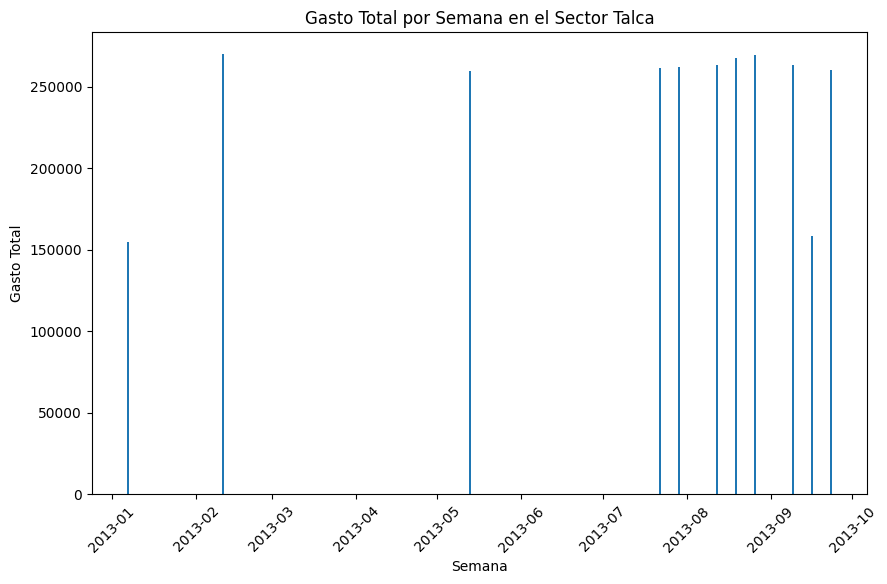

In [29]:
import time
import matplotlib.pyplot as plt
display("1. Visualizar el total gastado en una semana para la compra de insumos en un determinado sector de una región")
display(df_city[['id', 'name']])
time.sleep(5)
sector_id = int(input("Seleccione segun el número un sector"))
filtered_data = fact_table[(fact_table['id_city'] == sector_id)]

weekly_spending = filtered_data.groupby(pd.Grouper(key='date', freq='W-Mon'))['average'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(weekly_spending['date'], weekly_spending['average'])
plt.xlabel('Semana')
plt.ylabel('Gasto Total')
city_name = df_city.loc[df_city['id'] == sector_id, 'name'].values[0]
plt.title('Gasto Total por Semana en el Sector ' + city_name)
plt.xticks(rotation=45)
plt.show()

'2.Visualizar cuál es el sector de una región que tiene el mayor gasto en compra de insumos. Visualizar también cuál es la región que tiene el mayor gasto en compra de insumos.'

7
8


name_x
Curicó    1816583.45
Talca     2689094.13
Name: average, dtype: float64

'Talca'

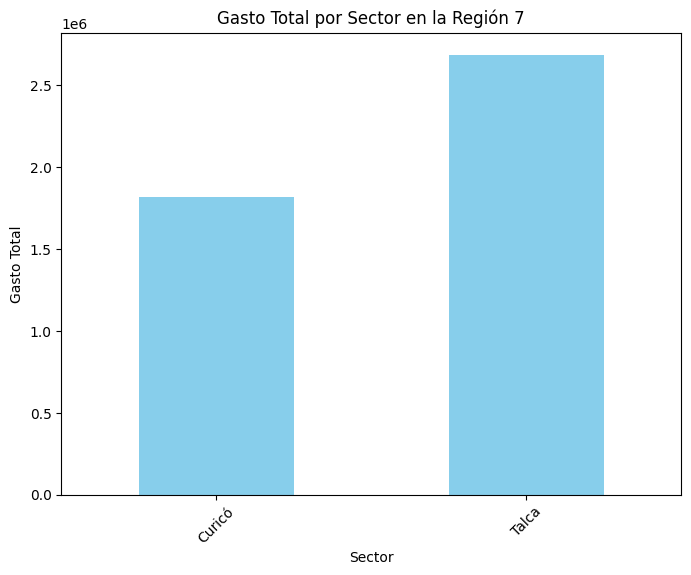

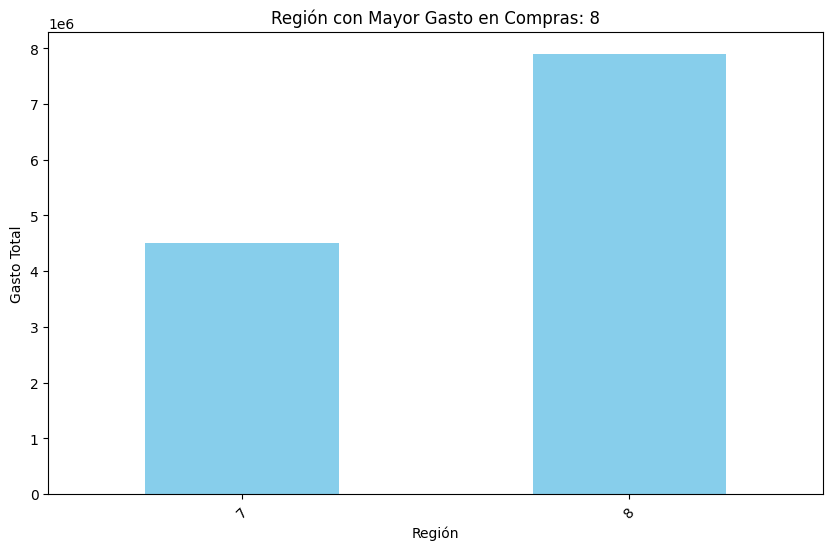

In [49]:
display("2.Visualizar cuál es el sector de una región que tiene el mayor gasto en compra de insumos. Visualizar también cuál es la región que tiene el mayor gasto en compra de insumos.")
unique_regions = df_city['region'].unique()

for region in unique_regions:
    print(region)

time.sleep(3)
region = int(input("Seleccione la región: "))

filtered_data = fact_table[(fact_table['region'] == region)]
region_sector_spending = filtered_data.groupby(['name_x'])['average'].sum()
display(region_sector_spending)
# Encontrar el sector con el mayor gasto en cada región
max_spending_per_region = region_sector_spending.idxmax()
display(max_spending_per_region)

plt.figure(figsize=(8, 6))
region_sector_spending.plot(kind='bar', color='skyblue')
plt.xlabel('Sector')
plt.ylabel('Gasto Total')
plt.title(f'Gasto Total por Sector en la Región {region}')
plt.xticks(rotation=45)
plt.show()

# Graficar la región con el mayor gasto en compras
# Calcular el gasto total por región
region_spending = fact_table.groupby('region')['average'].sum()

# Encontrar la región con el mayor gasto en compras
max_spending_region = region_spending.idxmax()

# Graficar la región con el mayor gasto en compras
plt.figure(figsize=(10, 6))
region_spending.plot(kind='bar', color='skyblue')
plt.xlabel('Región')
plt.ylabel('Gasto Total')
plt.title(f'Región con Mayor Gasto en Compras: {max_spending_region}')
plt.xticks(rotation=45)
plt.show()

In [17]:
with open('Scripts/star_schema.sql', 'r') as file:
    for line in file.read().split(';'):
        connection.execute(line)

In [18]:
transform = Transform(df_others)
transform.transform()
df_time = transform.get_df_time()
display(nan_data(df_time))

df_city = transform.get_df_city()
df_product = transform.get_df_product()
df_product_price = transform.get_df_products_price()

0

0

0

C:\Users\ignac\AppData\Local\Temp\ipykernel_12776\2011640105.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._df_product['name'] = self._df_product['Producto'].str.split('$').str[0].str.rstrip()


day      0
month    0
year     0
date     0
id       0
dtype: int64

In [19]:
load = Load(df_time, df_product, df_city, df_product_price, connection)
display(nan_data(df_time))
load.load()

df_product_price.to_csv("fact table others.csv", index=False)
df_product.to_csv("product others.csv", index=False)
df_city.to_csv("city others.csv", index=False)
df_time.to_csv("time others.csv", index=False)

day      0
month    0
year     0
date     0
id       0
dtype: int64

# Visualizaciones para datos correspondientes al resto de productos

In [20]:
display("1. Visualizar el total gastado en una semana para la compra de insumos en un determinado sector de una región")
display(df_city[['id', 'name']])
time.sleep(5)
sector_id = int(input("Seleccione segun el número un sector"))
filtered_data = fact_table[(fact_table['id_city'] == sector_id)]

weekly_spending = filtered_data.groupby(pd.Grouper(key='date', freq='W-Mon'))['average'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(weekly_spending['date'], weekly_spending['average'])
plt.xlabel('Semana')
plt.ylabel('Gasto Total')
city_name = df_city.loc[df_city['id'] == sector_id, 'name'].values[0]
plt.title('Gasto Total por Semana en el Sector ' + city_name)
plt.xticks(rotation=45)
plt.show()

NameError: name 'city_table' is not defined

In [ ]:
display("2.Visualizar cuál es el sector de una región que tiene el mayor gasto en compra de insumos. Visualizar también cuál es la región que tiene el mayor gasto en compra de insumos.")
unique_regions = df_city['region'].unique()

for region in unique_regions:
    print(region)

time.sleep(3)
region = int(input("Seleccione la región: "))

filtered_data = fact_table[(fact_table['region'] == region)]
region_sector_spending = filtered_data.groupby(['name_x'])['average'].sum()
display(region_sector_spending)
# Encontrar el sector con el mayor gasto en cada región
max_spending_per_region = region_sector_spending.idxmax()
display(max_spending_per_region)

plt.figure(figsize=(8, 6))
region_sector_spending.plot(kind='bar', color='skyblue')
plt.xlabel('Sector')
plt.ylabel('Gasto Total')
plt.title(f'Gasto Total por Sector en la Región {region}')
plt.xticks(rotation=45)
plt.show()

# Graficar la región con el mayor gasto en compras
# Calcular el gasto total por región
region_spending = fact_table.groupby('region')['average'].sum()

# Encontrar la región con el mayor gasto en compras
max_spending_region = region_spending.idxmax()

# Graficar la región con el mayor gasto en compras
plt.figure(figsize=(10, 6))
region_spending.plot(kind='bar', color='skyblue')
plt.xlabel('Región')
plt.ylabel('Gasto Total')
plt.title(f'Región con Mayor Gasto en Compras: {max_spending_region}')
plt.xticks(rotation=45)
plt.show()